In [1]:
"hare krishna"

'hare krishna'

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [4]:
import nltk

def parse_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    
    # Perform Part-Of-Speech (POS) tagging
    pos_tags = nltk.pos_tag(words)
    
    # Perform Named Entity Recognition (NER) and chunking
    named_entity_chunk = nltk.ne_chunk(pos_tags)
    
    # Display the parse tree
    named_entity_chunk.draw()

# Example input sentence
input_sentence = "John Doe is studying at Stanford University in California."

# Parse the input sentence
parse_sentence(input_sentence)


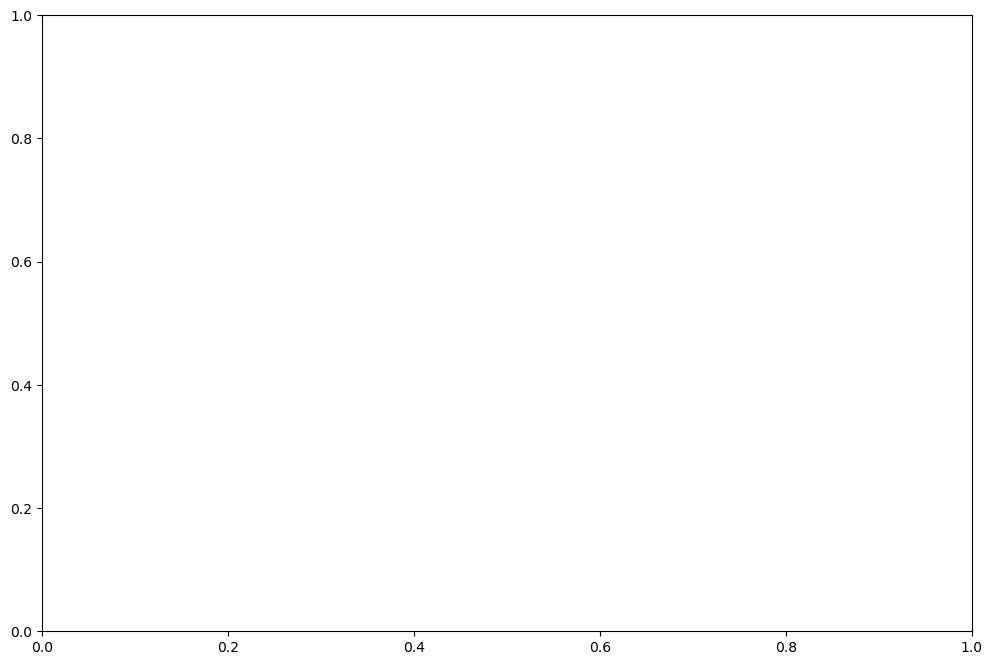

In [5]:
import nltk
from nltk import pos_tag, word_tokenize, ne_chunk
from nltk.tree import Tree
import matplotlib.pyplot as plt

# Sample sentence
sentence = "John Doe is studying at Stanford University in California."

# Tokenize, POS-tag, and chunk the sentence
words = word_tokenize(sentence)
pos_tags = pos_tag(words)
named_entity_tree = ne_chunk(pos_tags)

# Function to plot the tree with a white background
def plot_tree(tree):
    # Create a figure with white background
    fig = plt.figure(figsize=(12, 8), facecolor='white')
    ax = fig.add_subplot(111)
    ax.set_facecolor('white')

    # Draw the tree
    tree.draw()

# Plot the parse tree
plot_tree(named_entity_tree)


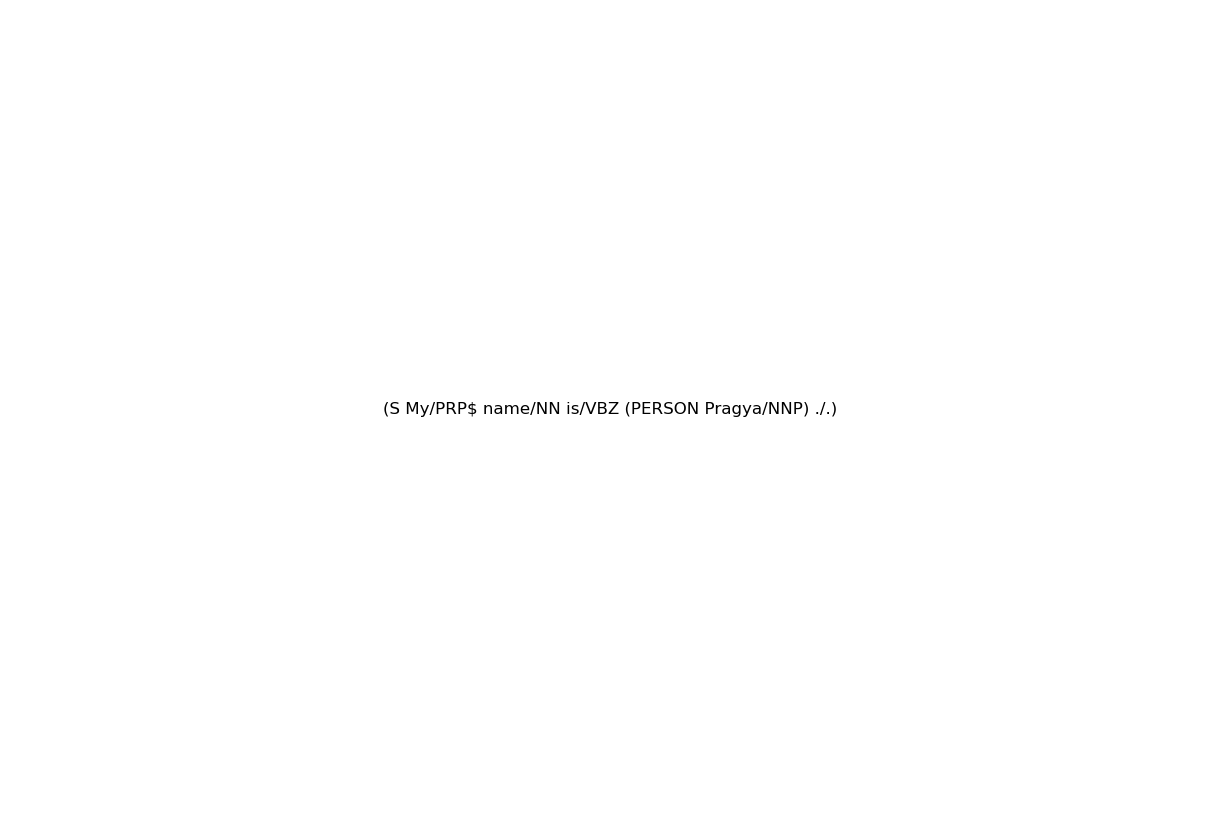

In [7]:
import nltk
from nltk import pos_tag, word_tokenize, ne_chunk
from nltk.tree import Tree
import matplotlib.pyplot as plt

# Sample sentence
sentence = "My name is Pragya."

# Tokenize, POS-tag, and chunk the sentence
words = word_tokenize(sentence)
pos_tags = pos_tag(words)
named_entity_tree = ne_chunk(pos_tags)

# Function to draw the parse tree inline in the notebook
def draw_nltk_tree(tree):
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
    ax.set_axis_off()  # Hide axes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    # Draw the tree using matplotlib
    tree_text = tree.pformat(margin=100)
    ax.text(0.5, 0.5, tree_text, fontsize=12, va='center', ha='center')
    
    plt.show()

# Plot the parse tree
draw_nltk_tree(named_entity_tree)


Tokenization: ['The', 'dog', 'chases', 'the', 'cat']
POS Tags: [('The', 'Det'), ('dog', 'Noun'), ('chases', 'Verb'), ('the', 'Det'), ('cat', 'Noun')]

Parse Tree Steps:
(S
  (NP (Det The) (Nominal (Noun dog)))
  (VP (Verb chases) (NP (Det the) (Nominal (Noun cat)))))
                  S                   
      ____________|_____               
     |                  VP            
     |             _____|___           
     NP           |         NP        
  ___|_____       |      ___|_____     
 |      Nominal   |     |      Nominal
 |         |      |     |         |    
Det       Noun   Verb  Det       Noun 
 |         |      |     |         |    
The       dog   chases the       cat  



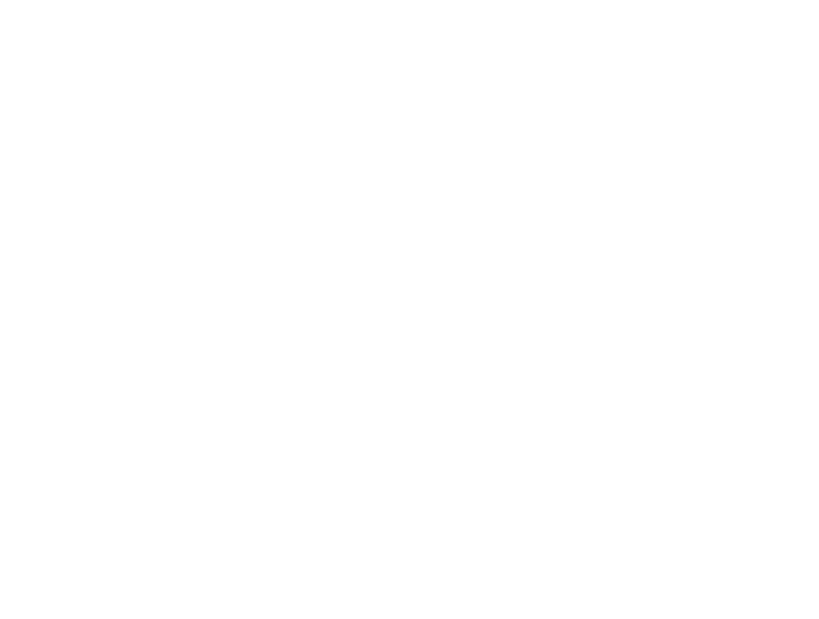

In [8]:
import nltk
from nltk import CFG
from nltk.tree import Tree

# Step 1: Tokenize the sentence
sentence = "The dog chases the cat"
tokens = nltk.word_tokenize(sentence)
print("Tokenization:", tokens)

# Step 2: Manually assign POS tags
# We'll define the POS tags manually according to our grammar
pos_tags = [('The', 'Det'), ('dog', 'Noun'), ('chases', 'Verb'), ('the', 'Det'), ('cat', 'Noun')]
print("POS Tags:", pos_tags)

# Step 3: Define the grammar
grammar = CFG.fromstring("""
  S -> NP VP
  NP -> Det Nominal
  Nominal -> Noun
  VP -> Verb NP
  Det -> 'The' | 'the'
  Noun -> 'dog' | 'cat'
  Verb -> 'chases'
""")

# Step 4: Create the parser
parser = nltk.ChartParser(grammar)

# Step 5: Parse the sentence
print("\nParse Tree Steps:")
for tree in parser.parse(tokens):
    print(tree)
    tree.pretty_print()
    
# Show the parse tree in a simpler format (decision tree style)
def draw_nltk_tree(tree):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
    ax.set_axis_off()  # Hide axes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    tree.draw()

for tree in parser.parse(tokens):
    draw_nltk_tree(tree)


Tokenization: ['The', 'dog', 'chases', 'the', 'cat']
POS Tags: [('The', 'Det'), ('dog', 'Noun'), ('chases', 'Verb'), ('the', 'Det'), ('cat', 'Noun')]


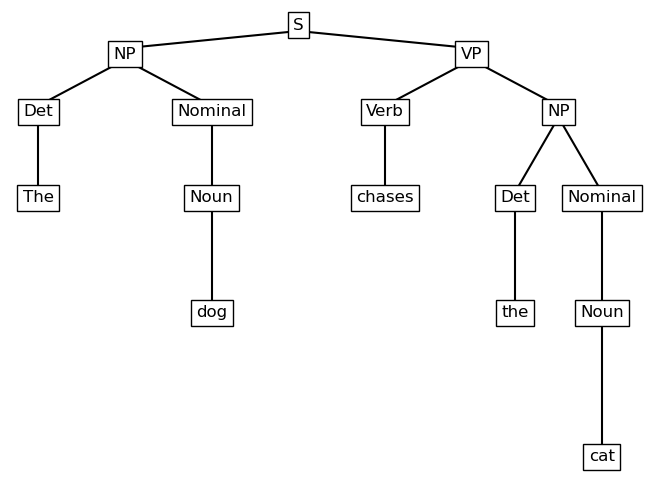

In [9]:
import nltk
from nltk import CFG
import matplotlib.pyplot as plt
from matplotlib import patches

# Step 1: Define the grammar
grammar = CFG.fromstring("""
  S -> NP VP
  NP -> Det Nominal
  Nominal -> Noun
  VP -> Verb NP
  Det -> 'The' | 'the'
  Noun -> 'dog' | 'cat'
  Verb -> 'chases'
""")

# Step 2: Tokenize the sentence
sentence = "The dog chases the cat"
tokens = nltk.word_tokenize(sentence)
print("Tokenization:", tokens)

# Step 3: POS tagging (manually assigned for simplicity)
pos_tags = [('The', 'Det'), ('dog', 'Noun'), ('chases', 'Verb'), ('the', 'Det'), ('cat', 'Noun')]
print("POS Tags:", pos_tags)

# Step 4: Create the parser
parser = nltk.ChartParser(grammar)

# Step 5: Parse the sentence
trees = list(parser.parse(tokens))

# Step 6: Function to plot the tree using matplotlib
def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """ Recursively plot the tree using Matplotlib """
    node_name = tree.label() if isinstance(tree, nltk.Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, nltk.Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

# Step 7: Set up Matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_axis_off()  # Hide the axes

# Plot each tree in the parser output
for tree in trees:
    plot_tree(tree, ax)

# Step 8: Show the plot
plt.show()


In [10]:
import nltk
from nltk import CFG
import matplotlib.pyplot as plt

# Function to dynamically create grammar based on POS tags
def create_grammar(pos_tags):
    grammar_rules = []
    
    # Collect unique words by POS
    det = []
    noun = []
    verb = []
    
    for word, tag in pos_tags:
        if tag == 'DT':  # Determiner
            det.append(word)
        elif tag.startswith('NN'):  # Noun
            noun.append(word)
        elif tag.startswith('VB'):  # Verb
            verb.append(word)
    
    # Create grammar rules based on identified words
    if det:
        grammar_rules.append(f"Det -> {' | '.join(det)}")
    if noun:
        grammar_rules.append(f"Noun -> {' | '.join(noun)}")
    if verb:
        grammar_rules.append(f"Verb -> {' | '.join(verb)}")
    
    # Add sentence structure
    grammar_rules.append("S -> NP VP")
    grammar_rules.append("NP -> Det Nominal")
    grammar_rules.append("Nominal -> Noun")
    grammar_rules.append("VP -> Verb NP")
    
    return CFG.fromstring("\n".join(grammar_rules))

# Function to plot the tree using matplotlib
def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """ Recursively plot the tree using Matplotlib """
    node_name = tree.label() if isinstance(tree, nltk.Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, nltk.Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

# Main function to get user input, tokenize, POS tag, parse, and visualize
def main():
    # Step 1: Get user input
    sentence = input("Enter a sentence: ")

    # Step 2: Tokenization and POS tagging
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)  # NLTK's POS tagger
    print("POS Tags:", pos_tags)

    # Step 3: Create grammar based on POS tags
    grammar = create_grammar(pos_tags)

    # Step 4: Parse the sentence
    parser = nltk.ChartParser(grammar)
    trees = list(parser.parse(tokens))

    # Step 5: Set up Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_axis_off()  # Hide the axes

    # Plot each tree in the parser output
    for tree in trees:
        plot_tree(tree, ax)

    # Step 6: Show the plot
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


POS Tags: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Pragya', 'NNP')]


ValueError: Grammar does not cover some of the input words: "'My', 'name', 'is', 'Pragya'".

In [12]:
import nltk
from nltk import CFG
import matplotlib.pyplot as plt

# Function to dynamically create grammar based on POS tags
def create_grammar(pos_tags):
    grammar_rules = []

    # Collect unique words by POS
    det = []
    noun = []
    verb = []
    adj = []  # Adjective
    adv = []  # Adverb
    
    for word, tag in pos_tags:
        if tag == 'DT':  # Determiner
            det.append(word)
        elif tag.startswith('NN'):  # Noun
            noun.append(word)
        elif tag.startswith('VB'):  # Verb
            verb.append(word)
        elif tag.startswith('JJ'):  # Adjective
            adj.append(word)
        elif tag.startswith('RB'):  # Adverb
            adv.append(word)
    
    # Create grammar rules based on identified words
    if det:
        grammar_rules.append(f"Det -> {' | '.join(set(det))}")
    if noun:
        grammar_rules.append(f"Noun -> {' | '.join(set(noun))}")
    if verb:
        grammar_rules.append(f"Verb -> {' | '.join(set(verb))}")
    if adj:
        grammar_rules.append(f"Adj -> {' | '.join(set(adj))}")
    if adv:
        grammar_rules.append(f"Adv -> {' | '.join(set(adv))}")
    
    # Add sentence structure
    grammar_rules.append("S -> NP VP")
    grammar_rules.append("NP -> Det Nominal | Adj Nominal | Det Adj Nominal")
    grammar_rules.append("Nominal -> Noun")
    grammar_rules.append("VP -> Verb NP | Verb")
    
    return CFG.fromstring("\n".join(grammar_rules))

# Function to plot the tree using matplotlib
def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """ Recursively plot the tree using Matplotlib """
    node_name = tree.label() if isinstance(tree, nltk.Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, nltk.Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

# Main function to get user input, tokenize, POS tag, parse, and visualize
def main():
    # Step 1: Get user input
    sentence = input("Enter a sentence: ")

    # Step 2: Tokenization and POS tagging
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)  # NLTK's POS tagger
    print("POS Tags:", pos_tags)

    # Step 3: Create grammar based on POS tags
    grammar = create_grammar(pos_tags)

    # Step 4: Parse the sentence
    parser = nltk.ChartParser(grammar)
    trees = list(parser.parse(tokens))

    # Check if any trees were generated
    if not trees:
        print("No parse tree generated. The grammar may not cover the input sentence.")
        return

    # Step 5: Set up Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_axis_off()  # Hide the axes

    # Plot each tree in the parser output
    for tree in trees:
        plot_tree(tree, ax)

    # Step 6: Show the plot
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


POS Tags: [('Radhe', 'NNP'), ('is', 'VBZ'), ('eating', 'VBG'), ('food', 'NN')]


ValueError: Grammar does not cover some of the input words: "'Radhe', 'is', 'eating', 'food'".

In [16]:
import nltk
from nltk import CFG
import matplotlib.pyplot as plt

# Define a simple grammar structure
def define_grammar():
    return CFG.fromstring("""
        S -> NP VP                     # A sentence consists of a noun phrase and a verb phrase
        VP -> Verb NP                  # A verb phrase consists of a verb followed by a noun phrase
        VP -> Aux Verb NP              # A verb phrase can also start with an auxiliary verb
        NP -> Det Nominal              # A noun phrase consists of a determiner followed by a nominal
        NP -> Proper_Noun              # A noun phrase can be a proper noun
        Nominal -> Noun                # A nominal consists of a noun
    """)

# Function to plot the parse tree
def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """ Recursively plot the tree using Matplotlib """
    node_name = tree.label() if isinstance(tree, nltk.Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, nltk.Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

# Main function to get user input, parse, and visualize
def main():
    # Step 1: Get user input
    sentence = input("Enter a simple sentence: ")

    # Step 2: Tokenization and POS tagging
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)  # NLTK's POS tagger
    print("POS Tags:", pos_tags)

    # Step 3: Define the grammar
    grammar = define_grammar()

    # Create a new grammar that incorporates the dynamic vocabulary
    dynamic_grammar_rules = """
        Det -> 'the' | 'The'          # Determiners
        Noun -> 'dog' | 'cat' | 'ball' | {NOUN} # Nouns including dynamic
        Verb -> 'chases' | 'sees' | 'likes' | {VERB}  # Verbs including dynamic
        Aux -> 'does' | 'is' | {AUX}   # Auxiliary verbs including dynamic
        Proper_Noun -> 'John' | 'Mary' | {PROPER_NOUN}  # Proper nouns including dynamic
    """

    # Replace vocabulary with dynamic words
    for word, tag in pos_tags:
        if tag.startswith('NN'):
            dynamic_grammar_rules = dynamic_grammar_rules.replace('{NOUN}', f"{word} | {{NOUN}}")
        elif tag.startswith('VB'):
            dynamic_grammar_rules = dynamic_grammar_rules.replace('{VERB}', f"{word} | {{VERB}}")
        elif tag.startswith('MD') or tag == 'is':
            dynamic_grammar_rules = dynamic_grammar_rules.replace('{AUX}', f"{word} | {{AUX}}")
        elif tag == 'NNP':
            dynamic_grammar_rules = dynamic_grammar_rules.replace('{PROPER_NOUN}', f"{word} | {{PROPER_NOUN}}")

    # Include dynamic rules into the grammar
    dynamic_grammar = CFG.fromstring(dynamic_grammar_rules)

    # Step 4: Parse the sentence
    parser = nltk.ChartParser(dynamic_grammar)
    trees = list(parser.parse(tokens))

    # Check if any trees were generated
    if not trees:
        print("No parse tree generated. The grammar may not cover the input sentence.")
        return

    # Step 5: Set up Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_axis_off()  # Hide the axes

    # Plot each tree in the parser output
    for tree in trees:
        plot_tree(tree, ax)

    # Step 6: Show the plot
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


POS Tags: [('John', 'NNP'), ('likes', 'VBZ'), ('ball', 'NN')]


ValueError: Unable to parse line 2: S -> NP VP                     # A sentence consists of a noun phrase and a verb phrase
Expected a nonterminal, found: # A sentence consists of a noun phrase and a verb phrase

In [15]:
from nltk import CFG

def define_grammar():
    return CFG.fromstring("""
        S -> NP VP
        VP -> Verb NP
        VP -> Aux Verb NP
        NP -> Det Nominal
        NP -> Proper_Noun
        Nominal -> Noun
        Det -> 'the' | 'The'
        Noun -> 'dog' | 'cat' | 'ball'
        Verb -> 'chases' | 'sees' | 'likes'
        Aux -> 'does' | 'is'
        Proper_Noun -> 'John' | 'Mary'
    """)

# Example of how to use the grammar
grammar = define_grammar()
print(grammar)


Grammar with 18 productions (start state = S)
    S -> NP VP
    VP -> Verb NP
    VP -> Aux Verb NP
    NP -> Det Nominal
    NP -> Proper_Noun
    Nominal -> Noun
    Det -> 'the'
    Det -> 'The'
    Noun -> 'dog'
    Noun -> 'cat'
    Noun -> 'ball'
    Verb -> 'chases'
    Verb -> 'sees'
    Verb -> 'likes'
    Aux -> 'does'
    Aux -> 'is'
    Proper_Noun -> 'John'
    Proper_Noun -> 'Mary'


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


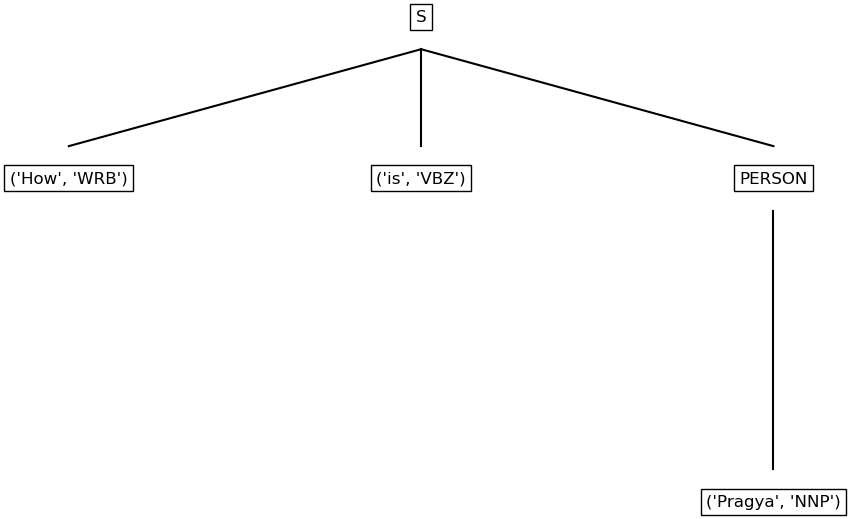

In [18]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    return parse_tree

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree = build_parse_tree(sentence)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['Pragya', 'is', 'eating', 'food']
POS Tags: [('Pragya', 'NNP'), ('is', 'VBZ'), ('eating', 'VBG'), ('food', 'NN')]
Parse Tree: (S (GPE Pragya/NNP) is/VBZ eating/VBG food/NN)


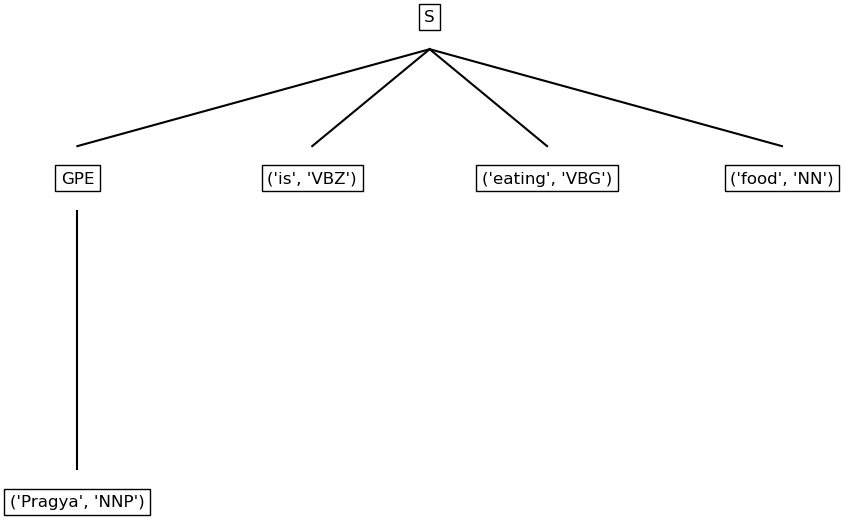

In [19]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure
    
    return parse_tree

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree = build_parse_tree(sentence)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['Pragya', 'is', 'eating', 'food']
POS Tags: [('Pragya', 'NNP'), ('is', 'VBZ'), ('eating', 'VBG'), ('food', 'NN')]
Parse Tree: (S (GPE Pragya/NNP) is/VBZ eating/VBG food/NN)
Pragya is a Geopolitical Entity (GPE).


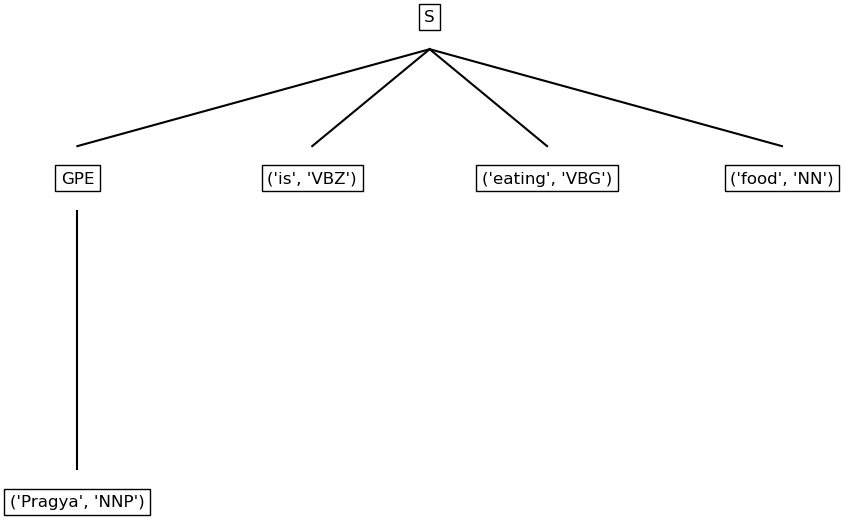

In [20]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def describe_tree_components(tree):
    """Describe components of the parse tree."""
    descriptions = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            label = subtree.label()
            # Adding specific descriptions for common labels
            if label == 'GPE':
                descriptions.append(f"{subtree[0][0]} is a Geopolitical Entity (GPE).")
            elif label == 'NNP':
                descriptions.append(f"{subtree[0][0]} is a Proper Noun (NNP).")
            elif label == 'VBZ':
                descriptions.append(f"{subtree[0][0]} is a Verb, 3rd person singular present (VBZ).")
            elif label == 'VBG':
                descriptions.append(f"{subtree[0][0]} is a Verb, gerund or present participle (VBG).")
            elif label == 'NN':
                descriptions.append(f"{subtree[0][0]} is a Noun (NN).")
            else:
                descriptions.append(f"{subtree[0][0]} is labeled as {label}.")
    return descriptions

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure

    # Describe tree components
    descriptions = describe_tree_components(parse_tree)
    for description in descriptions:
        print(description)  # Show the description of each component

    return parse_tree

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree = build_parse_tree(sentence)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['Pragya', 'is', 'eating', 'food']
POS Tags: [('Pragya', 'NNP'), ('is', 'VBZ'), ('eating', 'VBG'), ('food', 'NN')]
Parse Tree: (S (GPE Pragya/NNP) is/VBZ eating/VBG food/NN)
Pragya is a Geopolitical Entity (GPE).


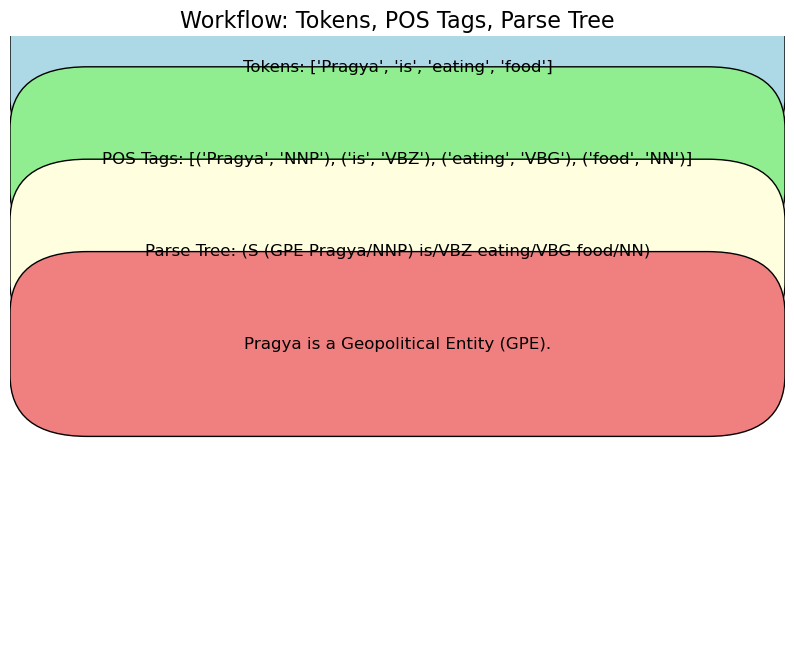

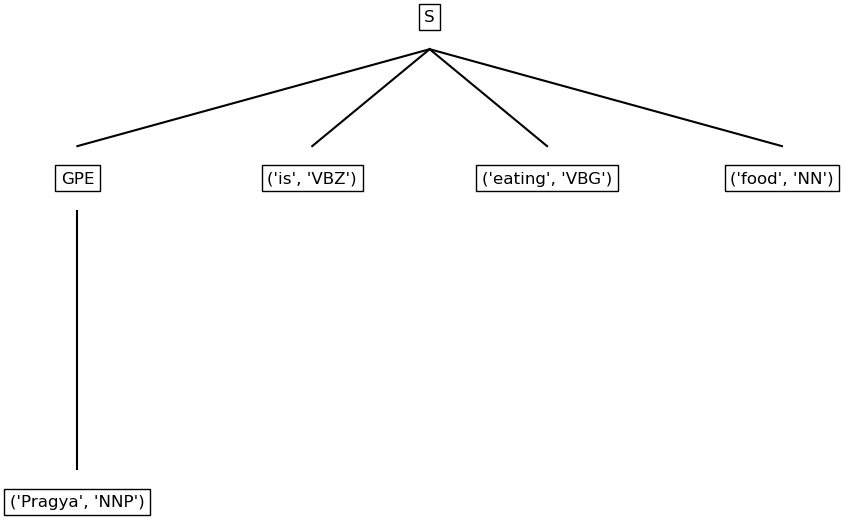

In [21]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def describe_tree_components(tree):
    """Describe components of the parse tree."""
    descriptions = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            label = subtree.label()
            # Adding specific descriptions for common labels
            if label == 'GPE':
                descriptions.append(f"{subtree[0][0]} is a Geopolitical Entity (GPE).")
            elif label == 'NNP':
                descriptions.append(f"{subtree[0][0]} is a Proper Noun (NNP).")
            elif label == 'VBZ':
                descriptions.append(f"{subtree[0][0]} is a Verb, 3rd person singular present (VBZ).")
            elif label == 'VBG':
                descriptions.append(f"{subtree[0][0]} is a Verb, gerund or present participle (VBG).")
            elif label == 'NN':
                descriptions.append(f"{subtree[0][0]} is a Noun (NN).")
            else:
                descriptions.append(f"{subtree[0][0]} is labeled as {label}.")
    return descriptions

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure

    # Describe tree components
    descriptions = describe_tree_components(parse_tree)
    for description in descriptions:
        print(description)  # Show the description of each component

    return parse_tree, tokens, pos_tags, descriptions

def plot_flowchart(tokens, pos_tags, parse_tree, descriptions):
    """Plot a flowchart showing tokens, POS tags, and parse tree descriptions."""
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')  # Turn off the axis

    # Define positions for boxes
    y_position = 0.9  # Starting vertical position
    height = 0.1
    box_width = 0.8

    # Add Tokens
    ax.add_patch(mpatches.FancyBboxPatch((0.1, y_position), box_width, height, 
                                          boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightblue'))
    ax.text(0.5, y_position + 0.05, "Tokens: " + str(tokens), ha='center', va='center', fontsize=12)

    y_position -= height + 0.05

    # Add POS Tags
    ax.add_patch(mpatches.FancyBboxPatch((0.1, y_position), box_width, height, 
                                          boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightgreen'))
    ax.text(0.5, y_position + 0.05, "POS Tags: " + str(pos_tags), ha='center', va='center', fontsize=12)

    y_position -= height + 0.05

    # Add Parse Tree
    ax.add_patch(mpatches.FancyBboxPatch((0.1, y_position), box_width, height, 
                                          boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightyellow'))
    ax.text(0.5, y_position + 0.05, "Parse Tree: " + str(parse_tree), ha='center', va='center', fontsize=12)

    y_position -= height + 0.05

    # Add Descriptions
    for description in descriptions:
        ax.add_patch(mpatches.FancyBboxPatch((0.1, y_position), box_width, height, 
                                              boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightcoral'))
        ax.text(0.5, y_position + 0.05, description, ha='center', va='center', fontsize=12)
        y_position -= height + 0.05

    plt.title('Workflow: Tokens, POS Tags, Parse Tree', fontsize=16)
    plt.show()

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree, tokens, pos_tags, descriptions = build_parse_tree(sentence)

    # Plot the flowchart
    plot_flowchart(tokens, pos_tags, parse_tree, descriptions)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['My', 'name', 'is', 'aditya']
POS Tags: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('aditya', 'JJ')]
Parse Tree: (S My/PRP$ name/NN is/VBZ aditya/JJ)


KeyError: 'description'

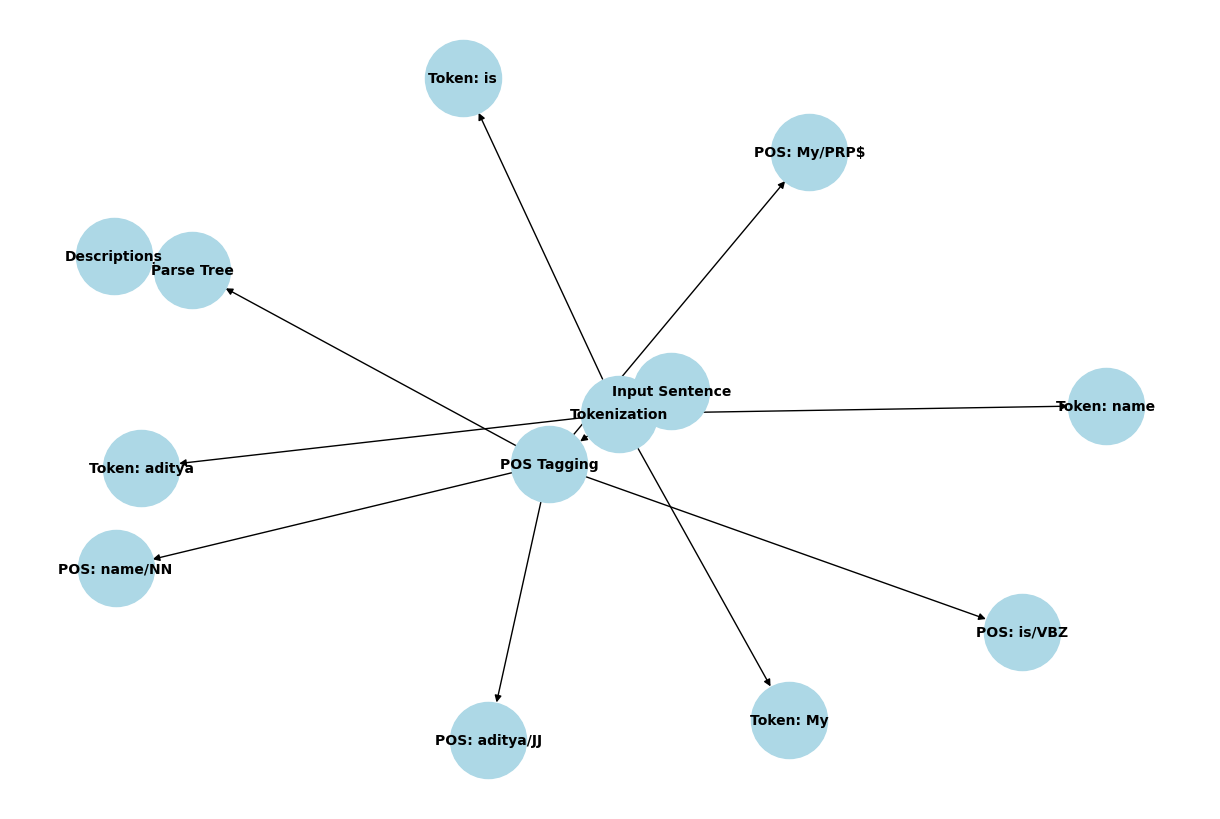

In [22]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt
import networkx as nx

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def describe_tree_components(tree):
    """Describe components of the parse tree."""
    descriptions = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            label = subtree.label()
            # Adding specific descriptions for common labels
            if label == 'GPE':
                descriptions.append(f"{subtree[0][0]} is a Geopolitical Entity (GPE).")
            elif label == 'NNP':
                descriptions.append(f"{subtree[0][0]} is a Proper Noun (NNP).")
            elif label == 'VBZ':
                descriptions.append(f"{subtree[0][0]} is a Verb, 3rd person singular present (VBZ).")
            elif label == 'VBG':
                descriptions.append(f"{subtree[0][0]} is a Verb, gerund or present participle (VBG).")
            elif label == 'NN':
                descriptions.append(f"{subtree[0][0]} is a Noun (NN).")
            else:
                descriptions.append(f"{subtree[0][0]} is labeled as {label}.")
    return descriptions

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure

    # Describe tree components
    descriptions = describe_tree_components(parse_tree)
    for description in descriptions:
        print(description)  # Show the description of each component

    return parse_tree, tokens, pos_tags, descriptions

def plot_workflow(tokens, pos_tags, parse_tree, descriptions):
    """Plot a workflow using networkx to show tokens, POS tags, and parse tree descriptions."""
    G = nx.DiGraph()  # Create a directed graph

    # Add nodes
    G.add_node("Input Sentence", pos='Input', description='User inputs a sentence.')
    G.add_node("Tokenization", pos='Process', description='Break the sentence into tokens.')
    G.add_node("POS Tagging", pos='Process', description='Tag each token with its part of speech.')
    G.add_node("Parse Tree", pos='Output', description='Create a parse tree from the POS tags.')
    G.add_node("Descriptions", pos='Output', description='Describe each component of the parse tree.')

    # Add edges (workflow connections)
    G.add_edge("Input Sentence", "Tokenization")
    G.add_edge("Tokenization", "POS Tagging")
    G.add_edge("POS Tagging", "Parse Tree")
    G.add_edge("Parse Tree", "Descriptions")

    # Add tokens and POS tags as separate nodes
    for token in tokens:
        G.add_node(f'Token: {token}', pos='Token')
        G.add_edge("Tokenization", f'Token: {token}')
    
    for word, tag in pos_tags:
        G.add_node(f'POS: {word}/{tag}', pos='Tag')
        G.add_edge("POS Tagging", f'POS: {word}/{tag}')

    # Create a layout and draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(12, 8))
    
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
    
    # Draw node labels with descriptions
    node_labels = {n: G.nodes[n]['description'] for n in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title('Workflow: Sentence Parsing', fontsize=16)
    plt.show()

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree, tokens, pos_tags, descriptions = build_parse_tree(sentence)

    # Plot the workflow
    plot_workflow(tokens, pos_tags, parse_tree, descriptions)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['My', 'name', 'is', 'khan']
POS Tags: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('khan', 'VBN')]
Parse Tree: (S My/PRP$ name/NN is/VBZ khan/VBN)


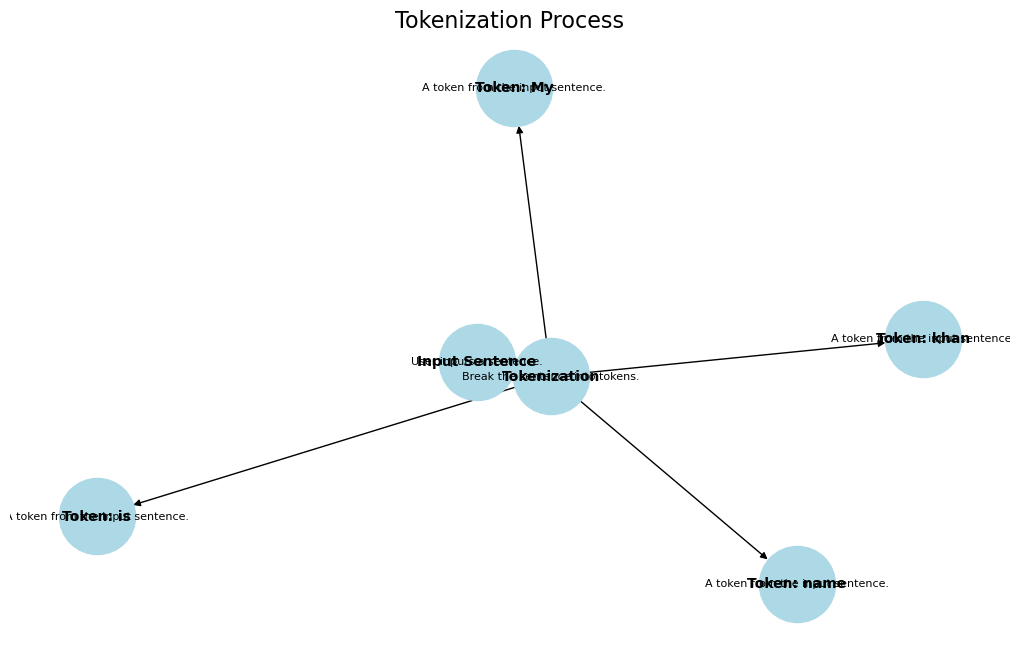

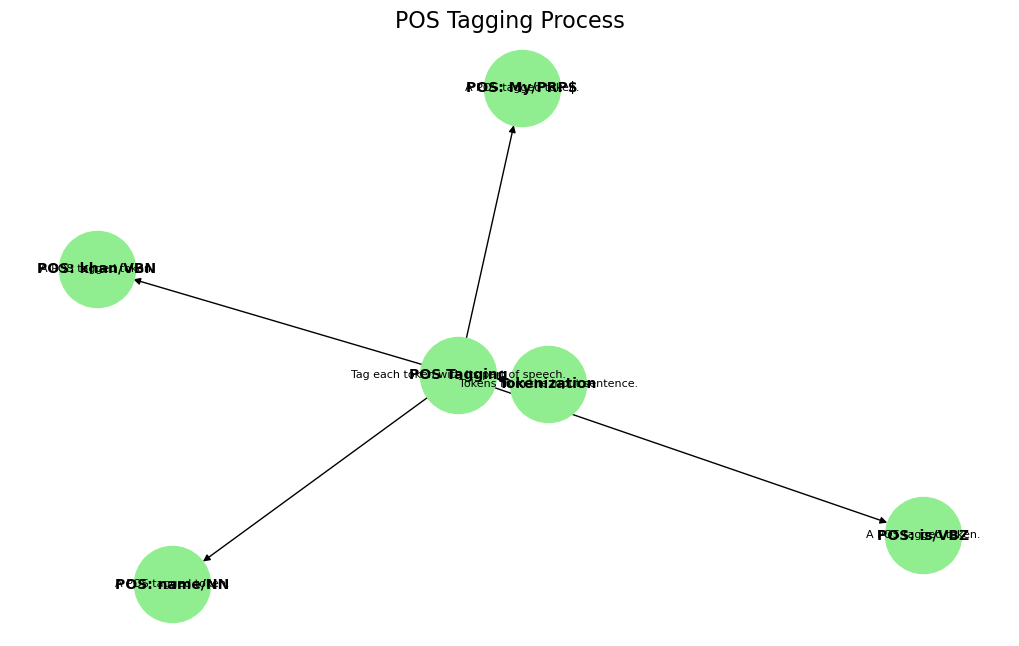

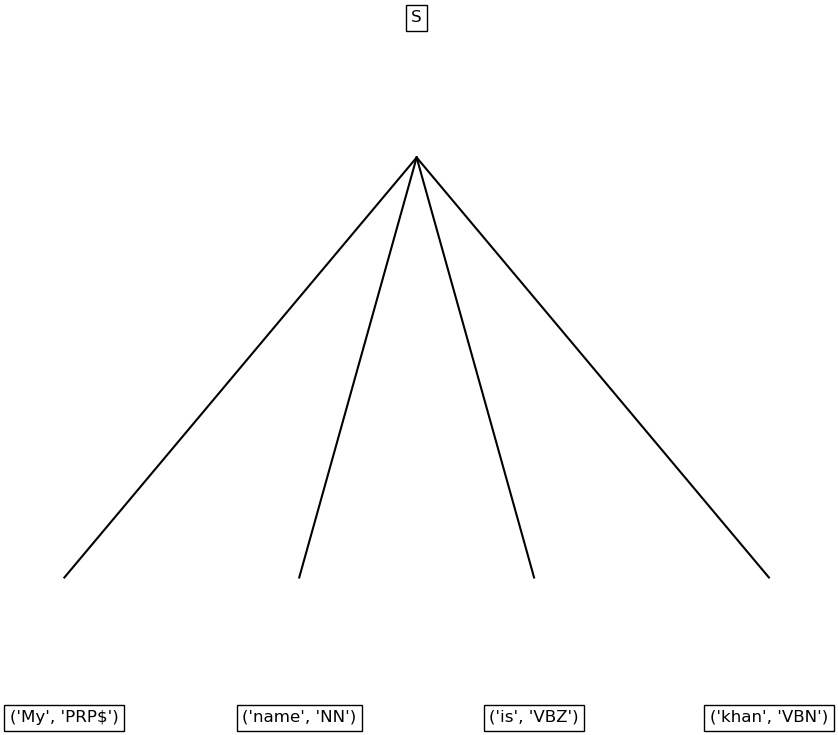

In [23]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt
import networkx as nx

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def describe_tree_components(tree):
    """Describe components of the parse tree."""
    descriptions = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            label = subtree.label()
            # Adding specific descriptions for common labels
            if label == 'GPE':
                descriptions.append(f"{subtree[0][0]} is a Geopolitical Entity (GPE).")
            elif label == 'NNP':
                descriptions.append(f"{subtree[0][0]} is a Proper Noun (NNP).")
            elif label == 'VBZ':
                descriptions.append(f"{subtree[0][0]} is a Verb, 3rd person singular present (VBZ).")
            elif label == 'VBG':
                descriptions.append(f"{subtree[0][0]} is a Verb, gerund or present participle (VBG).")
            elif label == 'NN':
                descriptions.append(f"{subtree[0][0]} is a Noun (NN).")
            else:
                descriptions.append(f"{subtree[0][0]} is labeled as {label}.")
    return descriptions

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure

    # Describe tree components
    descriptions = describe_tree_components(parse_tree)
    for description in descriptions:
        print(description)  # Show the description of each component

    return parse_tree, tokens, pos_tags, descriptions

def plot_tokenization(tokens):
    """Plot the tokenization process using networkx."""
    G = nx.DiGraph()  # Create a directed graph

    # Add nodes for the process
    G.add_node("Input Sentence", description='User inputs a sentence.')
    G.add_node("Tokenization", description='Break the sentence into tokens.')

    # Add edges (workflow connections)
    G.add_edge("Input Sentence", "Tokenization")

    # Add tokens as separate nodes
    for token in tokens:
        G.add_node(f'Token: {token}', description='A token from the input sentence.')
        G.add_edge("Tokenization", f'Token: {token}')

    # Create a layout and draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(10, 6))
    
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
    
    # Draw node labels with descriptions
    node_labels = {n: G.nodes[n]['description'] for n in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title('Tokenization Process', fontsize=16)
    plt.show()

def plot_pos_tagging(pos_tags):
    """Plot the POS tagging process using networkx."""
    G = nx.DiGraph()  # Create a directed graph

    # Add nodes for the process
    G.add_node("Tokenization", description='Tokens from the input sentence.')
    G.add_node("POS Tagging", description='Tag each token with its part of speech.')

    # Add edges (workflow connections)
    G.add_edge("Tokenization", "POS Tagging")

    # Add POS tags as separate nodes
    for word, tag in pos_tags:
        G.add_node(f'POS: {word}/{tag}', description='A POS tagged token.')
        G.add_edge("POS Tagging", f'POS: {word}/{tag}')

    # Create a layout and draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(10, 6))
    
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_color='black', font_weight='bold', arrows=True)
    
    # Draw node labels with descriptions
    node_labels = {n: G.nodes[n]['description'] for n in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title('POS Tagging Process', fontsize=16)
    plt.show()

def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree, tokens, pos_tags, descriptions = build_parse_tree(sentence)

    # Plot the tokenization process
    plot_tokenization(tokens)

    # Plot the POS tagging process
    plot_pos_tagging(pos_tags)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the parse tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jaydaksharora/nltk_data...
[nltk_data]   Package words is already up-to-date!


Tokens: ['My', 'name', 'is', 'jay']
POS Tags: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('jay', 'JJ')]
Parse Tree: (S My/PRP$ name/NN is/VBZ jay/JJ)


/var/folders/6t/1kmd_3s53v37bwwqvp7nsfph0000gn/T/ipykernel_65487/3024364349.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


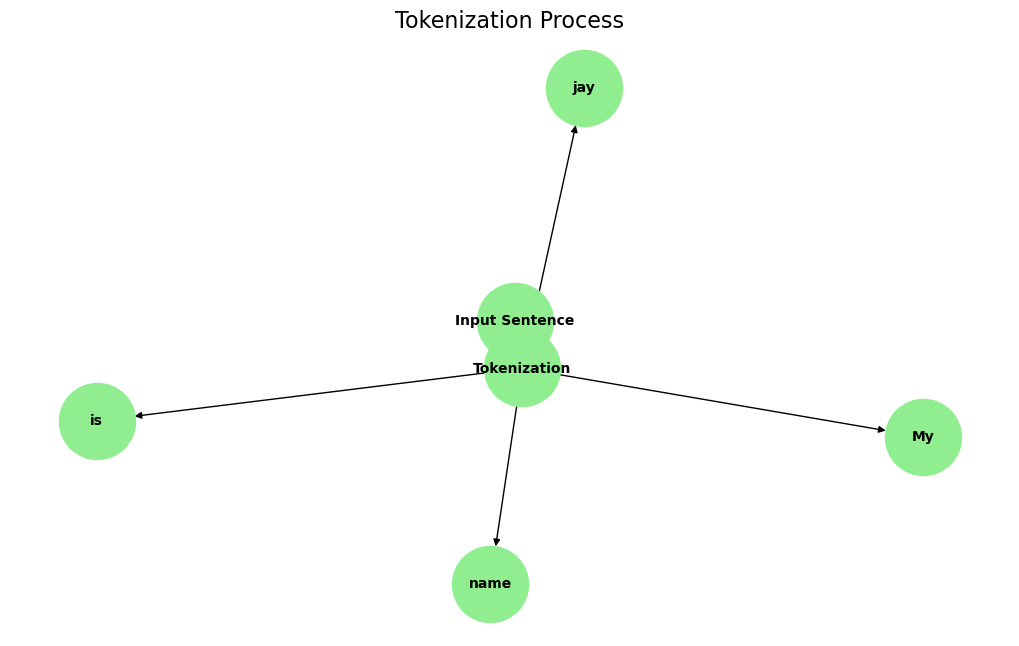

/var/folders/6t/1kmd_3s53v37bwwqvp7nsfph0000gn/T/ipykernel_65487/3024364349.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


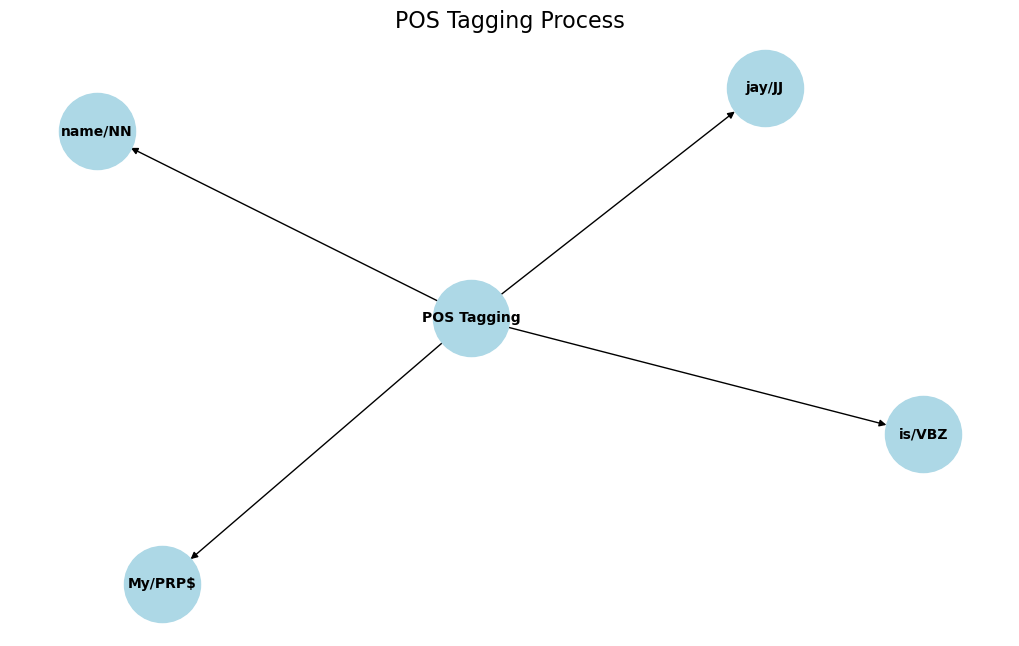

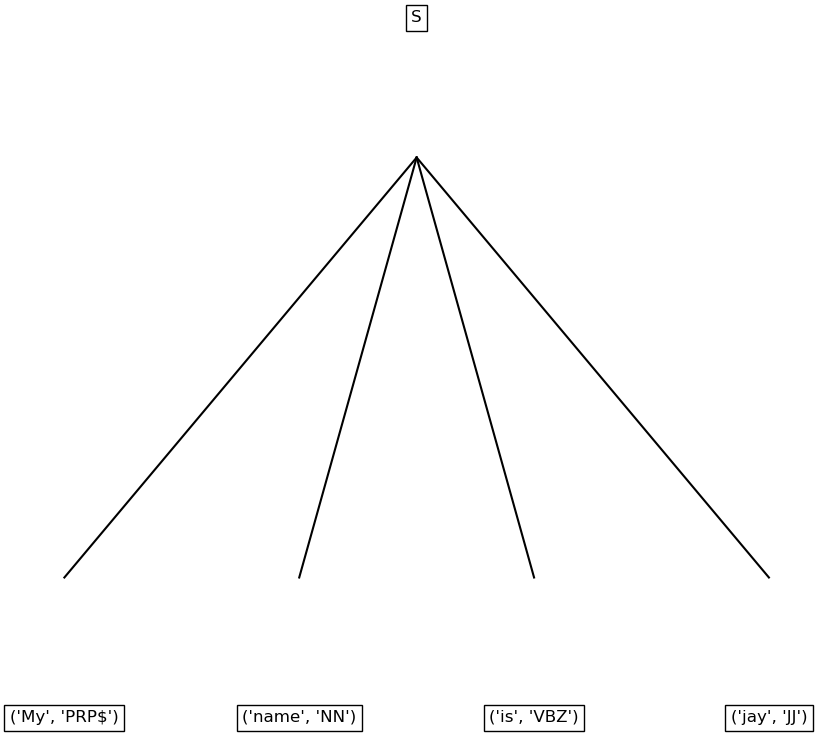

In [29]:
import nltk
from nltk import Tree
import matplotlib.pyplot as plt
import networkx as nx

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def describe_tree_components(tree):
    """Describe components of the parse tree."""
    descriptions = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            label = subtree.label()
            # Adding specific descriptions for common labels
            if label == 'GPE':
                descriptions.append(f"{subtree[0][0]} is a Geopolitical Entity (GPE).")
            elif label == 'NNP':
                descriptions.append(f"{subtree[0][0]} is a Proper Noun (NNP).")
            elif label == 'VBZ':
                descriptions.append(f"{subtree[0][0]} is a Verb, 3rd person singular present (VBZ).")
            elif label == 'VBG':
                descriptions.append(f"{subtree[0][0]} is a Verb, gerund or present participle (VBG).")
            elif label == 'NN':
                descriptions.append(f"{subtree[0][0]} is a Noun (NN).")
            else:
                descriptions.append(f"{subtree[0][0]} is labeled as {label}.")
    return descriptions

def build_parse_tree(sentence):
    """Builds a parse tree from the given sentence using NLTK's parsing functions."""
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    print("Tokens:", tokens)  # Show the tokens
    
    # Tag the tokens with part of speech
    pos_tags = nltk.pos_tag(tokens)
    print("POS Tags:", pos_tags)  # Show POS tags
    
    # Parse the POS tags using NLTK's named entity chunker
    parse_tree = nltk.ne_chunk(pos_tags)
    print("Parse Tree:", parse_tree)  # Show the parse tree structure

    # Describe tree components
    descriptions = describe_tree_components(parse_tree)
    for description in descriptions:
        print(description)  # Show the description of each component

    return parse_tree, tokens, pos_tags

def plot_tokenization(tokens):
    """Plot the tokenization process using NetworkX."""
    G = nx.DiGraph()  # Create a directed graph

    # Add the main node for Tokenization
    G.add_node("Tokenization")

    # Add tokens as separate nodes and connect them to the "Tokenization" node
    for token in tokens:
        G.add_node(token)  # Add the token as a node
        G.add_edge("Tokenization", token)  # Connect the token to the "Tokenization" node

    # Create a layout and draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(10, 6))

    # Draw nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_color='black', font_weight='bold', arrows=True)
    
    plt.title('Tokenization Process', fontsize=16)
    plt.tight_layout()
    plt.show()


def plot_pos_tagging(pos_tags):
    """Plot the POS tagging process using NetworkX."""
    G = nx.DiGraph()  # Create a directed graph

    # Add the main node for POS tagging
    G.add_node("POS Tagging")

    # Add POS tags as separate nodes and connect them to the "POS Tagging" node
    for word, tag in pos_tags:
        tagged_word = f'{word}/{tag}'  # Create the tagged word string
        G.add_node(tagged_word)  # Add the tagged word as a node
        G.add_edge("POS Tagging", tagged_word)  # Connect the tagged word to the "POS Tagging" node

    # Create a layout and draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(10, 6))

    # Draw nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
    
    plt.title('POS Tagging Process', fontsize=16)
    plt.tight_layout()
    plt.show()


def plot_tree(tree, ax, x=0, y=0, level=1, x_offset=0.4):
    """Recursively plot the tree using Matplotlib"""
    node_name = tree.label() if isinstance(tree, Tree) else tree
    ax.text(x, y, node_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # If it's a Tree object, we recursively plot its children
    if isinstance(tree, Tree):
        num_children = len(tree)
        new_x_start = x - x_offset * (num_children - 1) / 2  # Start plotting the children
        for i, child in enumerate(tree):
            child_x = new_x_start + i * x_offset
            child_y = y - 0.1 * level
            # Draw a line from the current node to the child
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')
            plot_tree(child, ax, child_x, child_y, level + 1, x_offset / num_children)

def main():
    # Get user input
    sentence = input("Enter a sentence: ")

    # Build the parse tree
    parse_tree, tokens, pos_tags = build_parse_tree(sentence)

    # Plot the tokenization process
    plot_tokenization(tokens)

    # Plot the POS tagging process
    plot_pos_tagging(pos_tags)

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Turn off the axis

    # Plot the parse tree
    plot_tree(parse_tree, ax)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()
